In [216]:
#Task1
import torch
import numpy
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

file = pd.read_csv("./p01_input.csv",header=0, encoding='CP949')

hwfile= file.loc[:,['키','몸무게']]
print(hwfile)


Saving p01_input.csv to p01_input.csv
          키   몸무게
0     125.8  27.3
1     124.3  25.4
2     119.2  23.5
3     115.0  20.0
4     120.0  33.5
...     ...   ...
9681  176.1  50.4
9682  174.1  88.8
9683  169.5  63.2
9684  159.2  52.9
9685  162.0  67.7

[9686 rows x 2 columns]


In [217]:
#Task2
heightmean= file['키'].mean()
weightmean= file['몸무게'].mean()
print(f"키 평균:{heightmean} , 몸무게 평균:{weightmean}")


키 평균:154.56444352674015 , 몸무게 평균:50.20759140673406


In [218]:
#Task3
hw=hwfile.dropna() #결측값 처리 삭제 
X= hw.loc[:,['키']]
Y=hw.loc[:,['몸무게']]
XY= X['키']*Y['몸무게']
EXY = XY.mean()
cov=EXY - (heightmean*weightmean)
dev_x = X['키'].std()
dev_y = Y['몸무게'].std()
Pxy = cov/(dev_x*dev_y)
print("상관계수:",Pxy)



상관계수: 0.8489853900947146


In [219]:
#Task4

x_train = torch.FloatTensor(X.values)
y_train = torch.FloatTensor(Y.values)
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 0.00001
for epoch in range(100000):
 W.requires_grad_(True)
 b.requires_grad_(True)
 hypothesis = torch.mm(x_train, W) + b
 cost = torch.mean((hypothesis - y_train) ** 2)
 cost.backward()
 with torch.no_grad() as grd:
  W = W - lr * W.grad
  b = b - lr * b.grad
  if epoch % 10000 == 0:
    print( 'epoch: {}, cost: {:.6f}, W: {}, b: {}' .format(epoch,cost.item(), W.squeeze(), b))

print(w,b)

epoch: 0, cost: 2812.360352, W: 0.1601269543170929, b: tensor([[0.0010]])
epoch: 10000, cost: 160.779999, W: 0.3323689103126526, b: tensor([[-0.1926]])
epoch: 20000, cost: 160.402710, W: 0.3336105942726135, b: tensor([[-0.3868]])
epoch: 30000, cost: 160.027130, W: 0.3348495662212372, b: tensor([[-0.5806]])
epoch: 40000, cost: 159.653488, W: 0.33608517050743103, b: tensor([[-0.7739]])
epoch: 50000, cost: 159.281509, W: 0.33731809258461, b: tensor([[-0.9668]])
epoch: 60000, cost: 158.911896, W: 0.33854609727859497, b: tensor([[-1.1589]])
epoch: 70000, cost: 158.543503, W: 0.3397729992866516, b: tensor([[-1.3508]])
epoch: 80000, cost: 158.176392, W: 0.34099867939949036, b: tensor([[-1.5425]])
epoch: 90000, cost: 157.812027, W: 0.34221798181533813, b: tensor([[-1.7333]])
tensor([[ 0.5863, -1.7192]]) tensor([[-1.9240]])


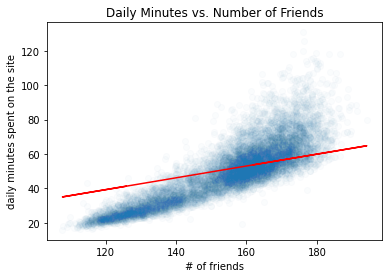

In [220]:
#Task5
x1 = torch.squeeze(torch.squeeze(x_train))
y1= torch.squeeze(torch.squeeze(y_train))
y2=[]
for i in range(len(x1)):
  y2.append(W*x1[i]+b)
plt.scatter(x1, y1, alpha=0.02)
plt.plot(x1,y2,'r')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()
